This file Contains the following 
    - Data Importing
    - Format Data & SOC Graph
    - Data analysis
        1. Energy Analysis
        2. Thermal Behaviour
        3. Internal Resistance Variation
        4. MPC Prediction Performance
        5. Efficiency vs. SOC window
        6. Cloud Round Trip Analysis

In [ ]:
# DATA IMPORTING
# Import all data sets and relavent packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_control_desk_data(filepath: str) -> pd.DataFrame:
    """
    Loads data from a dSPACE ControlDesk CSV file, skipping metadata headers
    and handling column offsets.
    """
    column_names = [
        'Time', 'Ibat', 'Tbat', 'Pbtm', 'SOC', 'Rbat',
        'Out[0][0]', 'Out[0][1]', 'Out[1][0]', 'Out[1][1]',
        'Out[2][0]', 'Out[2][1]', 'Out[3][0]', 'Out[3][1]',
        'Out[4][0]', 'Out[4][1]', 'Out[5][0]', 'Out[5][1]',
        'Out[6][0]', 'Out[6][1]', 'Out[7][0]', 'Out[7][1]',
        'Out[8][0]', 'Out[8][1]', 'Out[9][0]', 'Out[9][1]',
        'Out[10][0]', 'Out[10][1]'	
    ]

    # Calculate the number of columns to read
    num_cols_to_read = len(column_names)

    try:
        # Data starts on row 29, column 3 
        data = pd.read_csv(
            filepath,
            skiprows=28,
            header=None,
            names=column_names,
            usecols=range(2, 2 + num_cols_to_read)
        )
        print("File loaded successfully!")
        return data

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred while parsing the file: {e}")
        return None



# Load in data from drive cycle 2 (Urban)
    # Constant Rbat value cycles
rural_const = load_control_desk_data("ControlDesk/rural_const.csv")
    # DT used cycles
rural_dt = load_control_desk_data("ControlDesk/rural_DT.csv")

# Load in data from drive cycle 3 (Highway)
    # Constant Rbat value cycles
    # Data set was taken twice but values are the exact same so could only use 1
hwy_const_1 = load_control_desk_data("ControlDesk/hwy_const_1.csv")
#hwy_const_2 = load_control_desk_data("ControlDesk/hwy_const_2.csv")
    # DT used
hwy_dt_1 = load_control_desk_data("ControlDesk/hwy_DT_1.csv")
hwy_dt_2 = load_control_desk_data("ControlDesk/hwy_DT_2.csv")
hwy_dt_3 = load_control_desk_data("ControlDesk/hwy_DT_3.csv")



# Load in Log files created on Raspberry Pi
pi_log_file_path = {
    "pi_hwy_1": "RPi/hwy_dt_1.csv",
    "pi_hwy_2": "RPi/hwy_dt_2.csv",
    "pi_hwy_3": "RPi/hwy_dt_3.csv"
}
pi_logs = {}
for name, path in pi_log_file_path.items():
    try:
        df = pd.read_csv(path)
        pi_logs[name] = df
        print(f"'{name}' Loaded Successfullly")
        continue
    except FileNotFoundError:
        print(f"ERROR: File path invalid, '{path}'")
    except Exception as e:
        print(f"ERROR: {e}")



File loaded successfully!
File loaded successfully!
File loaded successfully!
File loaded successfully!
File loaded successfully!
File loaded successfully!
'pi_hwy_1' Loaded Successfullly
'pi_hwy_2' Loaded Successfullly
'pi_hwy_3' Loaded Successfullly


<function matplotlib.pyplot.show(close=None, block=None)>

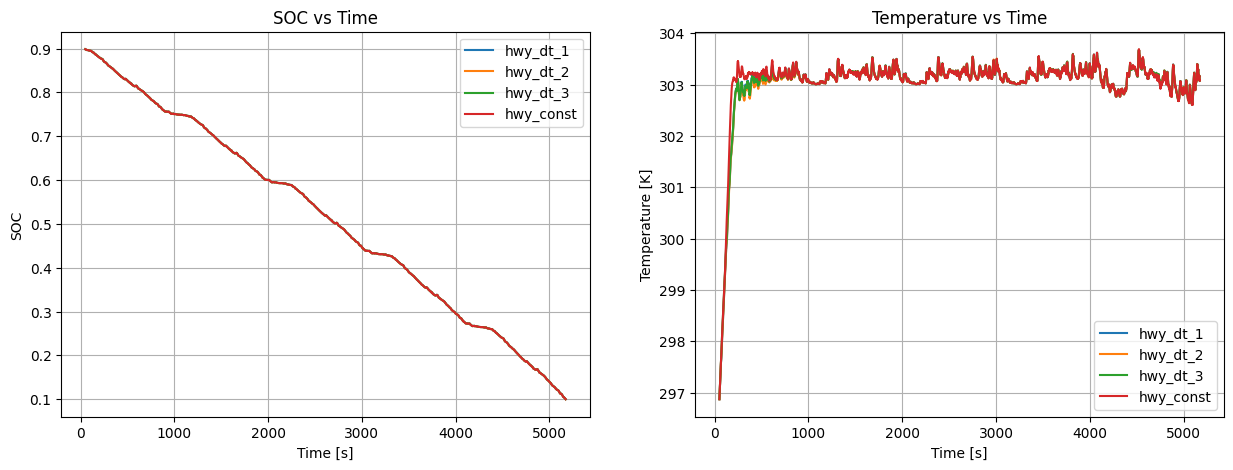

In [204]:
# DATA FORMATTING & SOC GRAPH

lower_time = 50.5     # 50.5 is the lower limit for when all datasets had DT updating
upper_time = 5172.8 # 5172.8 is the upper limit for when SOC>0.1

hwy_const = {
    'hwy_const':hwy_const_1[(hwy_const_1['Time'] >= lower_time) & (hwy_const_1['Time'] <= upper_time)], 
    #'hwy_const_2':hwy_const_2[(hwy_const_2['Time'] >= lower_time) & (hwy_const_2['Time'] <= upper_time)],
    }
hwy_dt = {
    'hwy_dt_1':hwy_dt_1[(hwy_dt_1['Time'] >= lower_time) & (hwy_dt_1['Time'] <= upper_time)], 
    'hwy_dt_2':hwy_dt_2[(hwy_dt_2['Time'] >= lower_time) & (hwy_dt_2['Time'] <= upper_time)], 
    'hwy_dt_3':hwy_dt_3[(hwy_dt_3['Time'] >= lower_time) & (hwy_dt_3['Time'] <= upper_time)]
    }
rural = {
    'rural_const': rural_const[(rural_const['Time'] >= 1000) & (rural_const['Time'] <= 3060)],
    'rural_dt': rural_dt[(rural_dt['Time'] >= 1000) & (rural_dt['Time'] <= 3060)]
}

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

for name, df in hwy_dt.items():
    #print(f"{name}\n\tStart Time:\t" + str(df['Time'].iloc[0]))
    #print("\tEnd Time:\t" + str(df['Time'].iloc[-1]))
    axes[0].plot(df['Time'], df['SOC'], label=f'{name}')
    axes[1].plot(df['Time'], df['Tbat'], label=f'{name}')
for name, df in hwy_const.items():
    #print(f"{name}\n\tStart Time:\t" + str(df['Time'].iloc[0]))
    #print("\tEnd Time:\t" + str(df['Time'].iloc[-1]))
    axes[0].plot(df['Time'], df['SOC'], label=f'{name}')
    axes[1].plot(df['Time'], df['Tbat'], label=f'{name}')

axes[0].set_ylabel('SOC')
axes[0].set_title('SOC vs Time')
axes[0].set_xlabel('Time [s]')
axes[0].grid(True)
axes[0].legend()

axes[1].set_ylabel('Temperature [K]')
axes[1].set_title('Temperature vs Time')
axes[1].set_xlabel('Time [s]')
axes[1].grid(True)
axes[1].legend()

plt.show

Constant Rbat:
	hwy_const: 0.8291158170635635
	MEAN: 0.8291158170635635

DT:
	hwy_dt_1: 0.823826369099011
	hwy_dt_2: 0.8275452689211977
	hwy_dt_3: 0.8252521973615223
	MEAN: 0.825541278460577

Difference = 0.431%


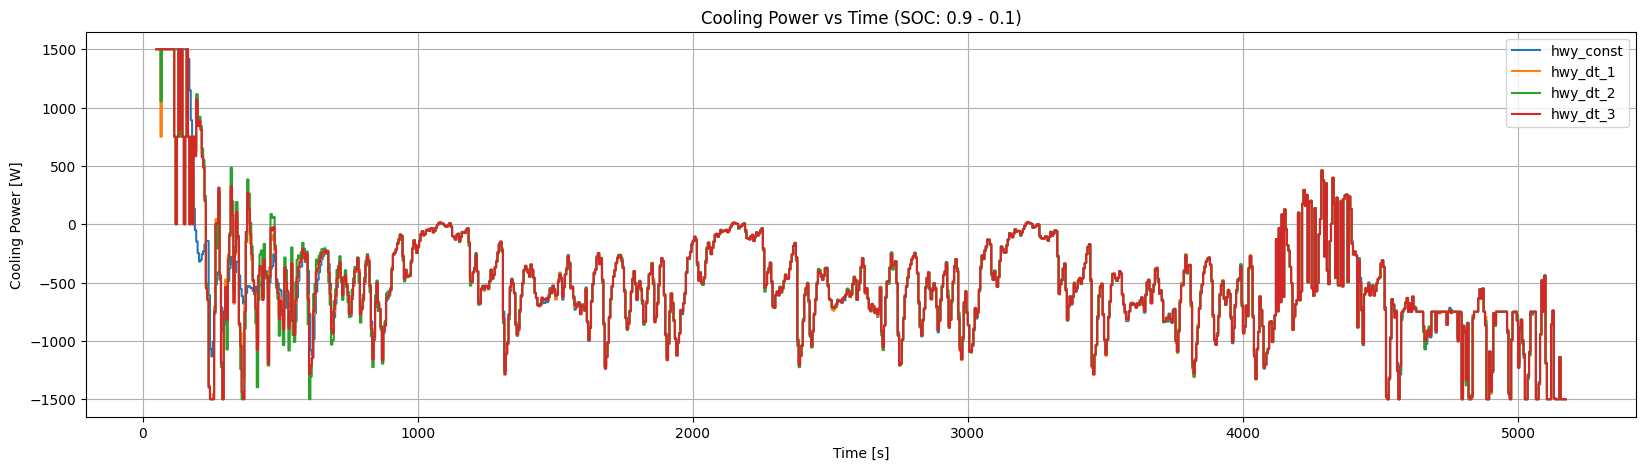

In [232]:
# 1. ENERGY ANALYSIS
"""
        Compare the energy consumption of the BTM with DT and with constant Rbat value
        Also print SOC vs Time
"""

E_const = []
E_dt = []
soc_upper = 0.9
soc_lower = 0.1

plt.figure(figsize=(20,5))

print("Constant Rbat:")
for name, df in hwy_const.items():
    df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
    power = df['Pbtm'].values
    time_data = df['Time'].values
    E_total = np.trapezoid(np.abs(power), time_data)
    E_total = E_total / 3.6e6
    print(f"\t{name}: {E_total}")
    E_const.append(E_total)
    plt.plot(df['Time'], df['Pbtm'],
             drawstyle='steps-post', label=f'{name}')
print(f"\tMEAN: {np.mean(E_const)}")

print("\nDT:")
for name, df in hwy_dt.items():
    df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
    power = df['Pbtm'].values
    time_data = df['Time'].values
    E_total = np.trapezoid(np.abs(power), time_data)
    E_total = E_total / 3.6e6
    print(f"\t{name}: {E_total}")
    E_dt.append(E_total)
    plt.plot(df['Time'], df['Pbtm'],
             drawstyle='steps-post', label=f'{name}')
print(f"\tMEAN: {np.mean(E_dt)}")

perc_diff = (np.mean(E_const) - np.mean(E_dt)) * ( 100 / np.mean(E_const))
print(f"\nDifference = {perc_diff:.3f}%")

plt.xlabel("Time [s]")
plt.ylabel("Cooling Power [W]")
plt.title(f"Cooling Power vs Time (SOC: {soc_upper} - {soc_lower})")
plt.legend()
plt.grid(True)
plt.show()


Standard Deviation
	hwy_const: 0.1551367444402049
	hwy_dt_1: 0.15373716564680823
	hwy_dt_2: 0.15383264547856898
	hwy_dt_3: 0.15391395080049633

Absolute Mean Deviation
	hwy_const: 0.19382145971583975
	hwy_dt_1: 0.19462122126267428
	hwy_dt_2: 0.19291608632122859
	hwy_dt_3: 0.19429986757416737


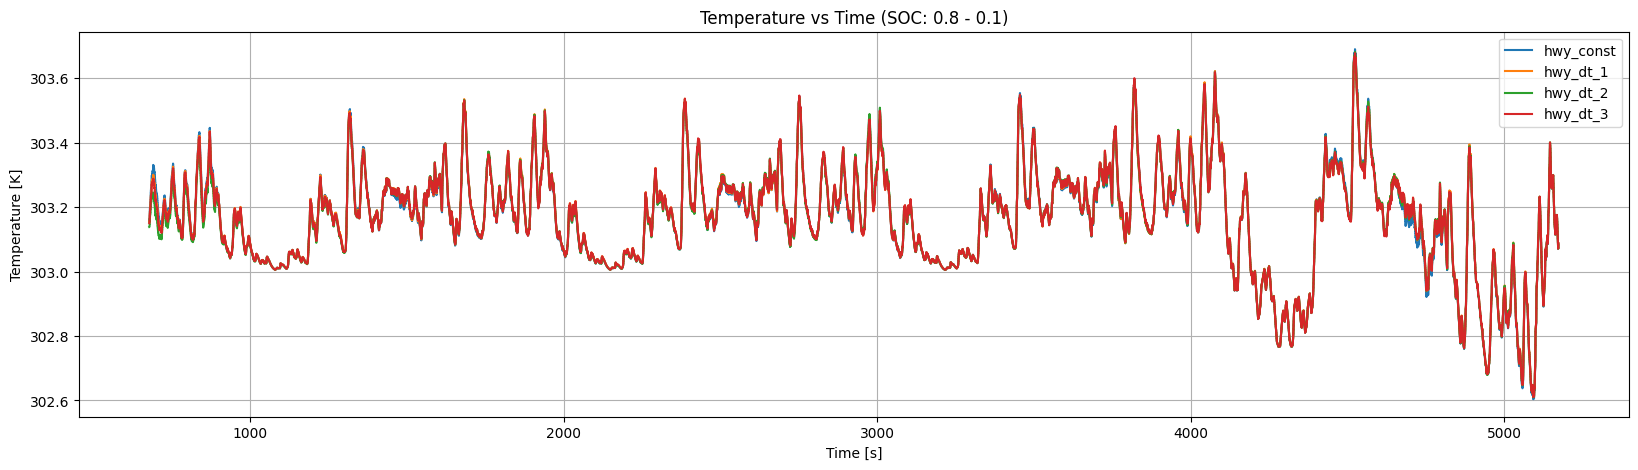

Differenc in Standard Deviation: 
	-0.8436581565314029%

Difference in Mean Absolute Deviation: 
	0.06411330150567149%


In [ ]:
#2. Thermal Behaviour
"""
        Plots the changing temperature against time
"""
std = {}
mad = {} # Mean absolute Deviation
t_midpoint = 303 # Midpoint cause UL = 40C and LL = 20C
plt.figure(figsize=(20,5))

soc_upper = 0.9
soc_lower = 0.1

for name, df in hwy_const.items():
    df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
    temp = df['Tbat'].values
    time_data = df['Time'].values
    plt.plot(df['Time'], df['Tbat'],
             drawstyle='steps-post', label=f'{name}')
    std[name] = np.std(df['Tbat'])
    abs_deviation = np.abs(df['Tbat'] - t_midpoint)
    mad[name] = np.mean(abs_deviation)

for name, df in hwy_dt.items():
    df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
    temp = df['Tbat'].values
    time_data = df['Time'].values
    plt.plot(df['Time'], df['Tbat'],
             drawstyle='steps-post', label=f'{name}')
    std[name] = np.std(df['Tbat'])
    abs_deviation = np.abs(df['Tbat'] - t_midpoint)
    mad[name] = np.mean(abs_deviation)

print("Standard Deviation")
for name, stds in std.items():
    print(f"\t{name}: {stds}")

print("\nAbsolute Mean Deviation")

for name, mads in mad.items():
    print(f"\t{name}: {mads}")

plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")
plt.title(f"Temperature vs Time (SOC: {soc_upper} - {soc_lower})")
plt.legend()
plt.grid(True)
plt.show()

# Calculates the % diff of std between dt and const 0
std_const = std["hwy_const"] 
#std_const = [ std["hwy_const_1"] , std["hwy_const_2"]]
std_dt = [ std["hwy_dt_1"], std["hwy_dt_2"], std["hwy_dt_3"]]
std_dt_mean = np.mean(std_dt)
std_const_mean = np.mean(std_const)
std_diff = (std_dt_mean - std_const_mean) / (std_const_mean)
print( "Differenc in Standard Deviation: \n\t" + str(std_diff * 100) + "%")

# Calculates the % diff of Mean Absolute Deviation between dt and const
mad_const = mad["hwy_const"] 
#mad_const = [ mad["hwy_const_1"] , mad["hwy_const_2"]]
mad_dt = [ mad["hwy_dt_1"], mad["hwy_dt_2"], mad["hwy_dt_3"]]
mad_dt_mean = np.mean(mad_dt)
mad_const_mean = np.mean(mad_const)
mad_diff = (mad_dt_mean - mad_const_mean) / mad_const_mean
print("\nDifference in Mean Absolute Deviation: \n\t" + str(mad_diff * 100) + "%")


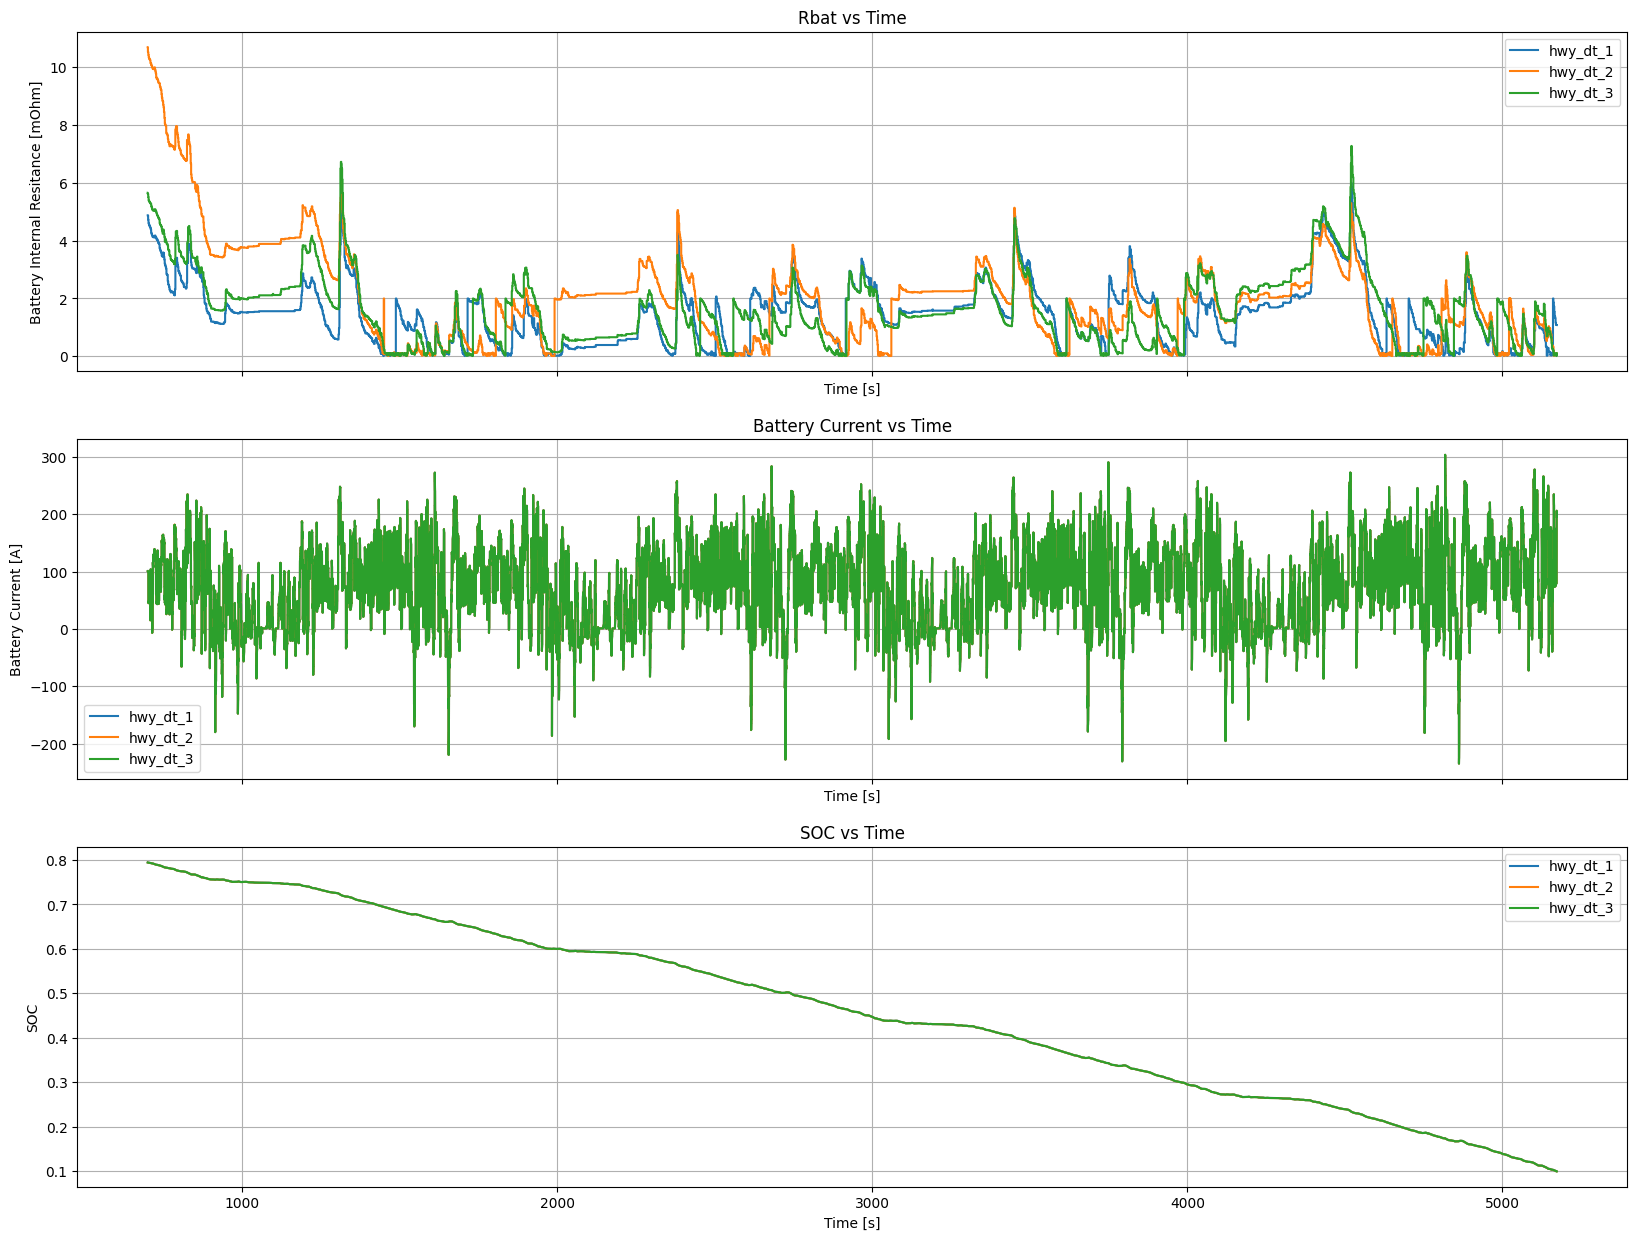

In [198]:
"""
    3. Internal Resistence Variation
        Plots the changes to internal resistence accross DT attempts
"""

fig, ax = plt.subplots(3,1,figsize=(20,15), sharex=True)

for name, df in hwy_dt.items():
    rbat_mohm = df['Rbat'].values * 1000
    time_data = df['Time'].values
    ax[0].plot(time_data, rbat_mohm,
             drawstyle='steps-post', label=f'{name}')
    
    ax[1].plot(time_data, df['Ibat'].values,
               drawstyle='steps-post', label=f'{name}')
    
    ax[2].plot(time_data, df['SOC'].values,
               drawstyle='steps-post', label=f'{name}')



ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Battery Internal Resitance [mOhm]")
ax[0].set_title("Rbat vs Time")
ax[0].grid(True)
ax[0].legend()

ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Battery Current [A]")
ax[1].set_title("Battery Current vs Time")
ax[1].grid(True)
ax[1].legend()

ax[2].set_xlabel("Time [s]")
ax[2].set_ylabel("SOC")
ax[2].set_title("SOC vs Time")
ax[2].grid(True)
ax[2].legend()

plt.show()

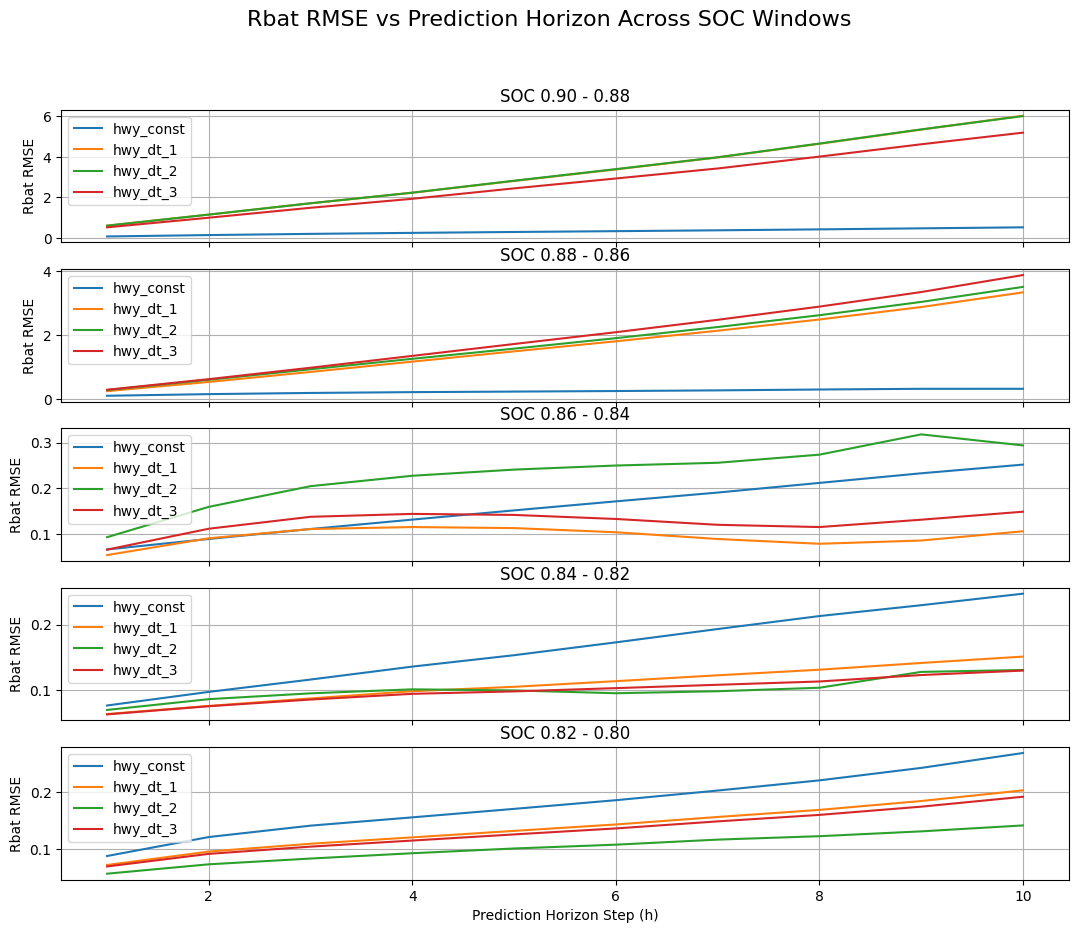

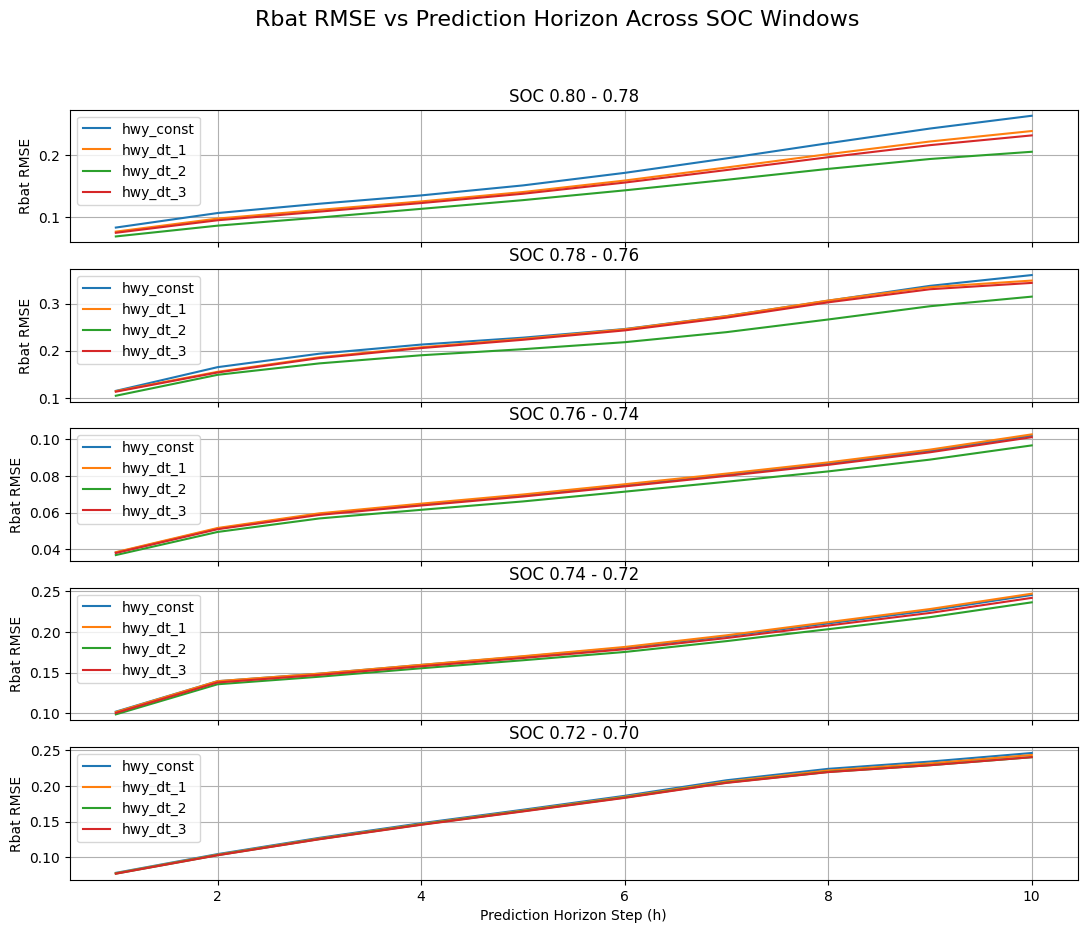

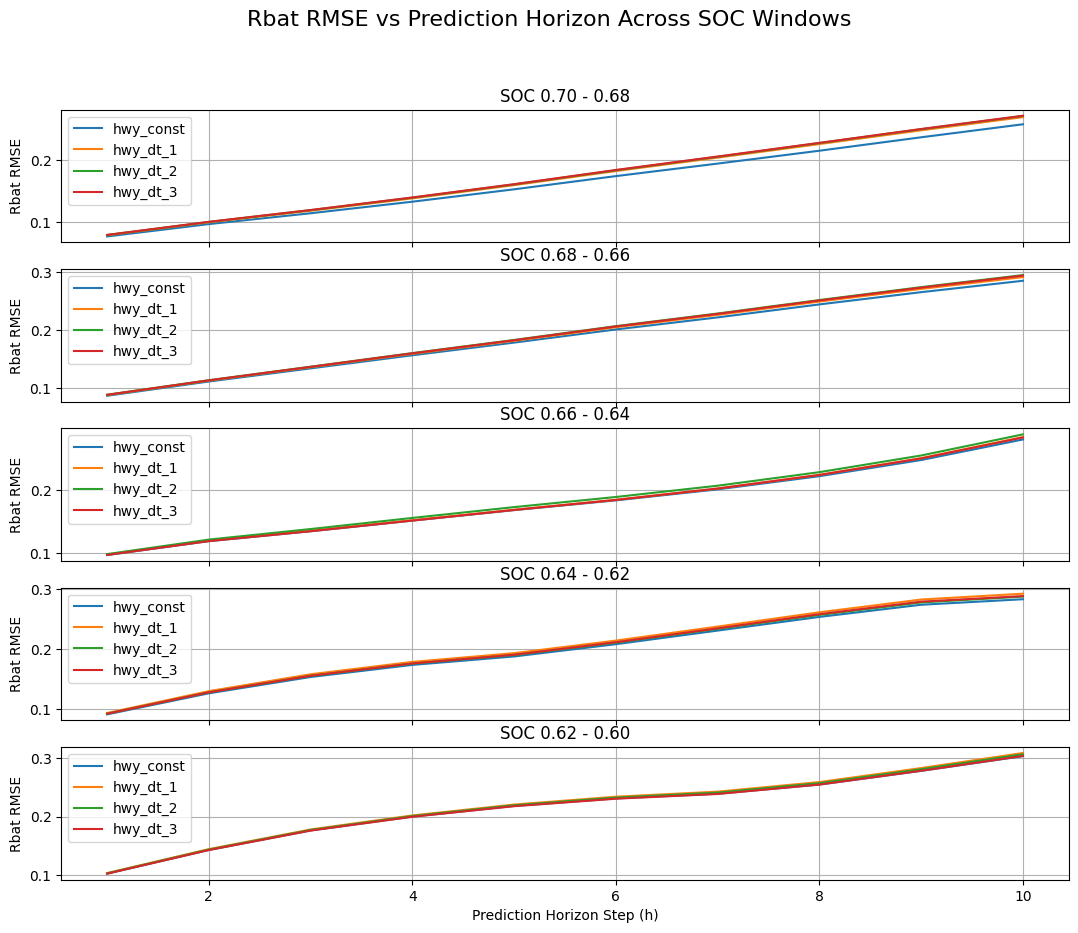

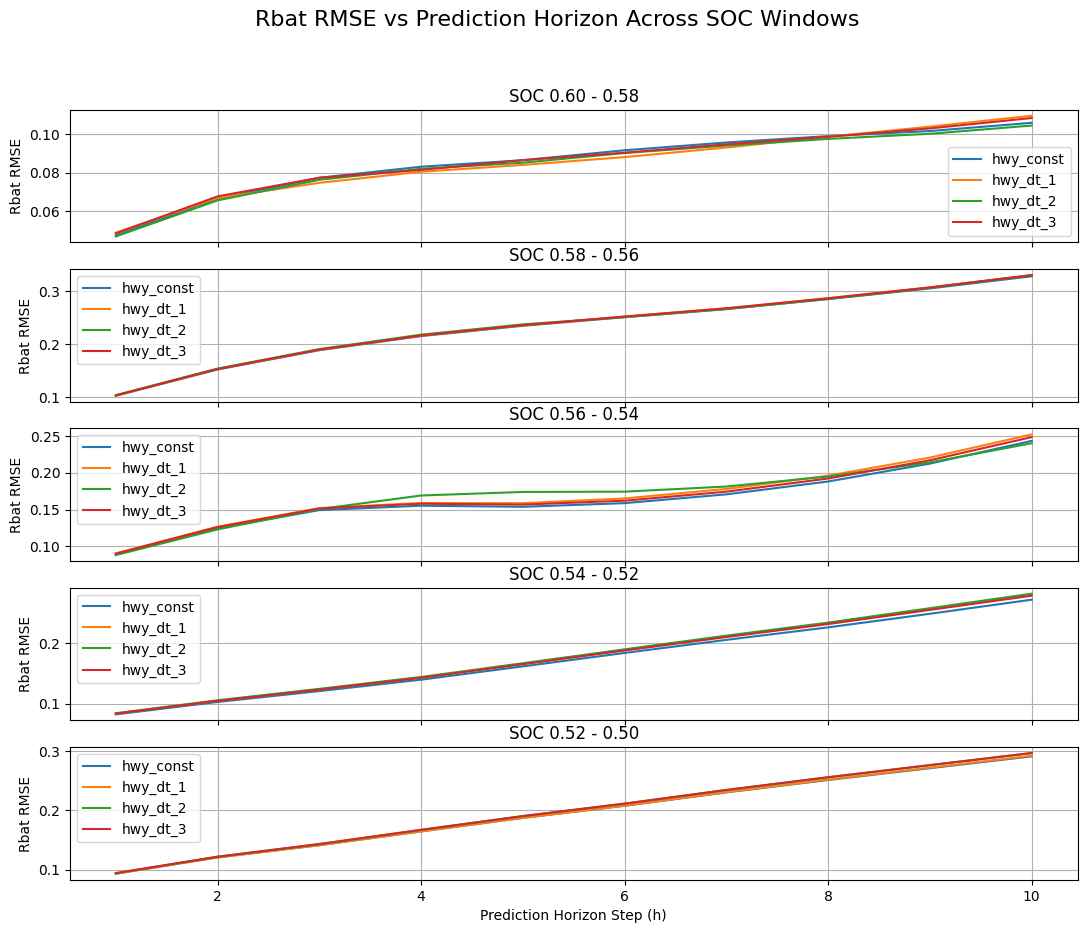

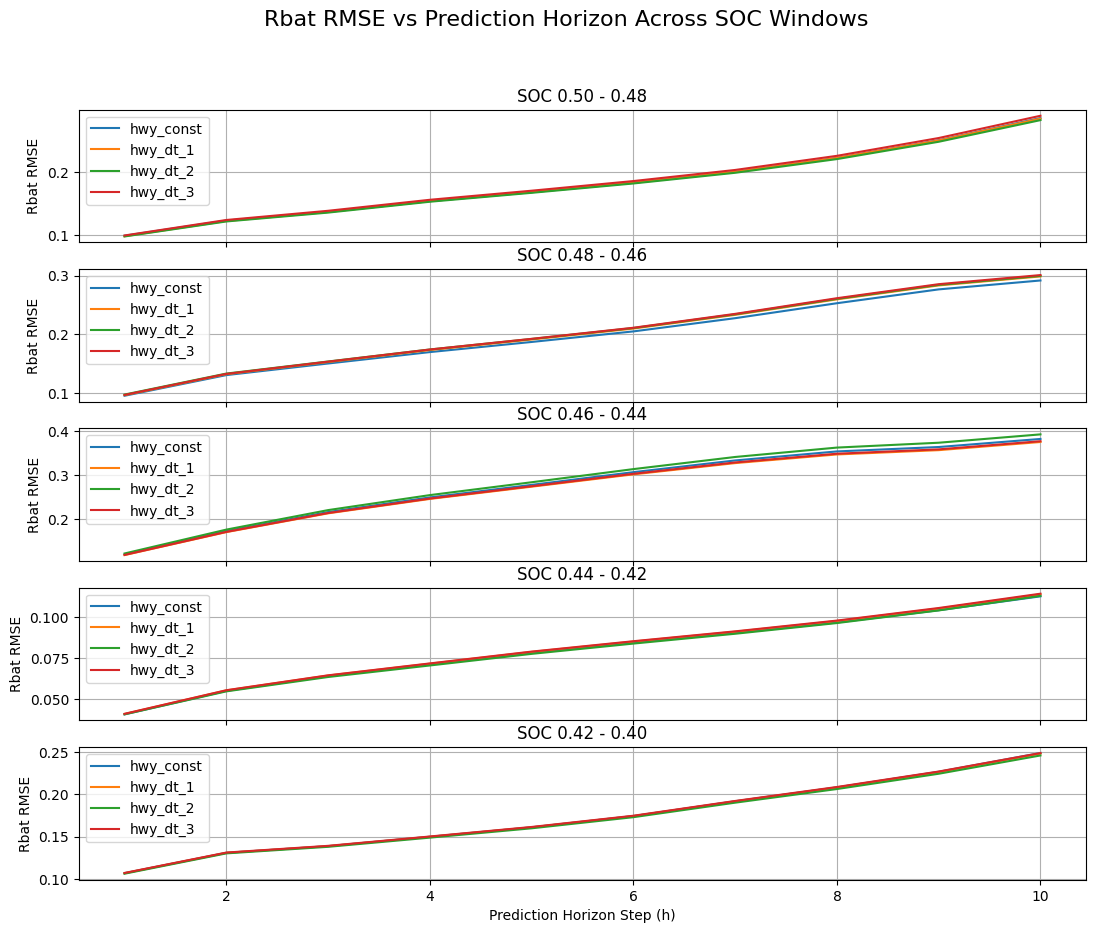

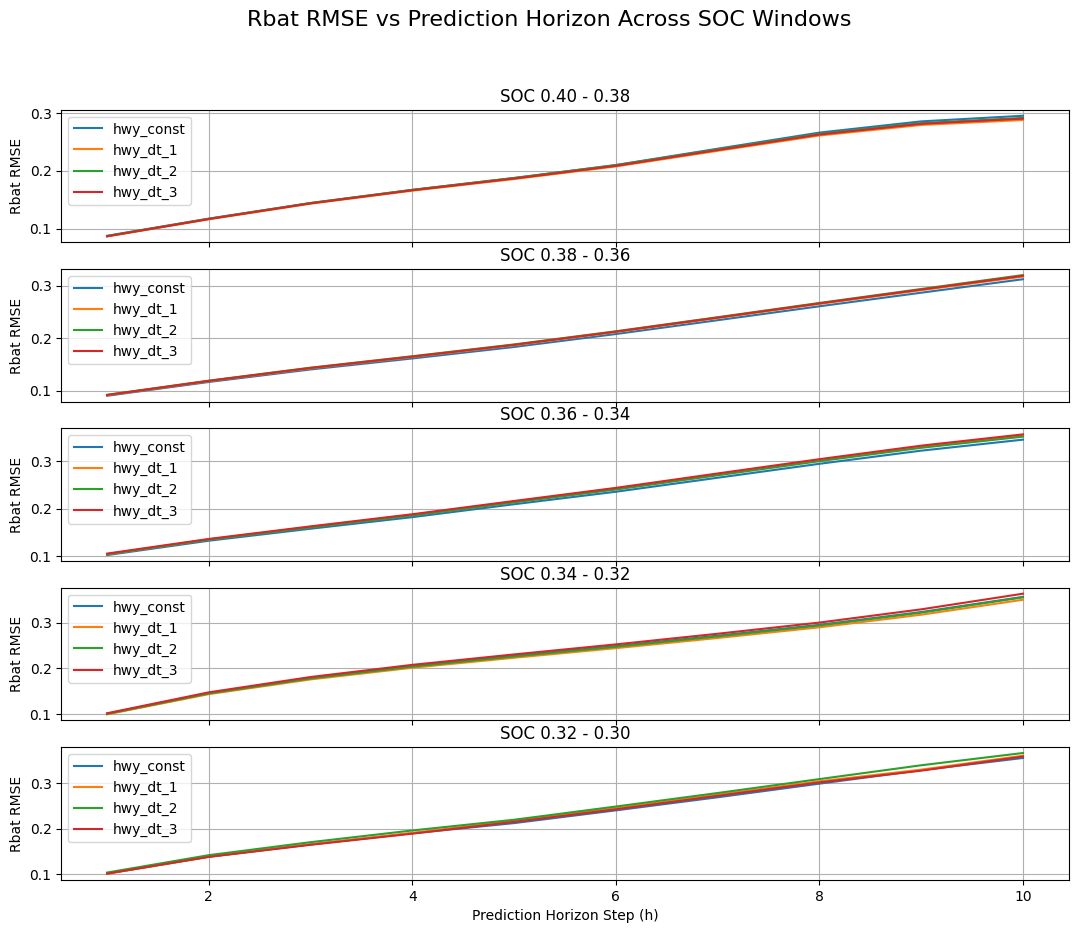

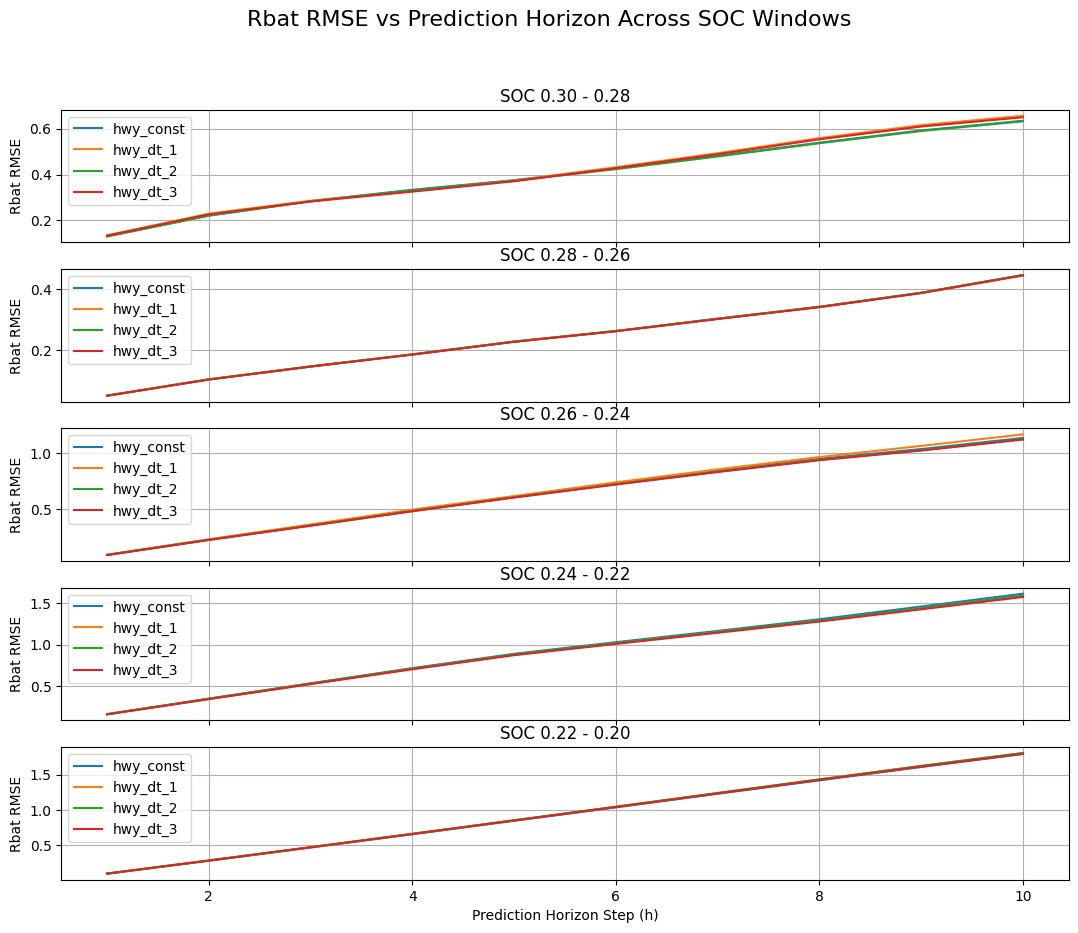

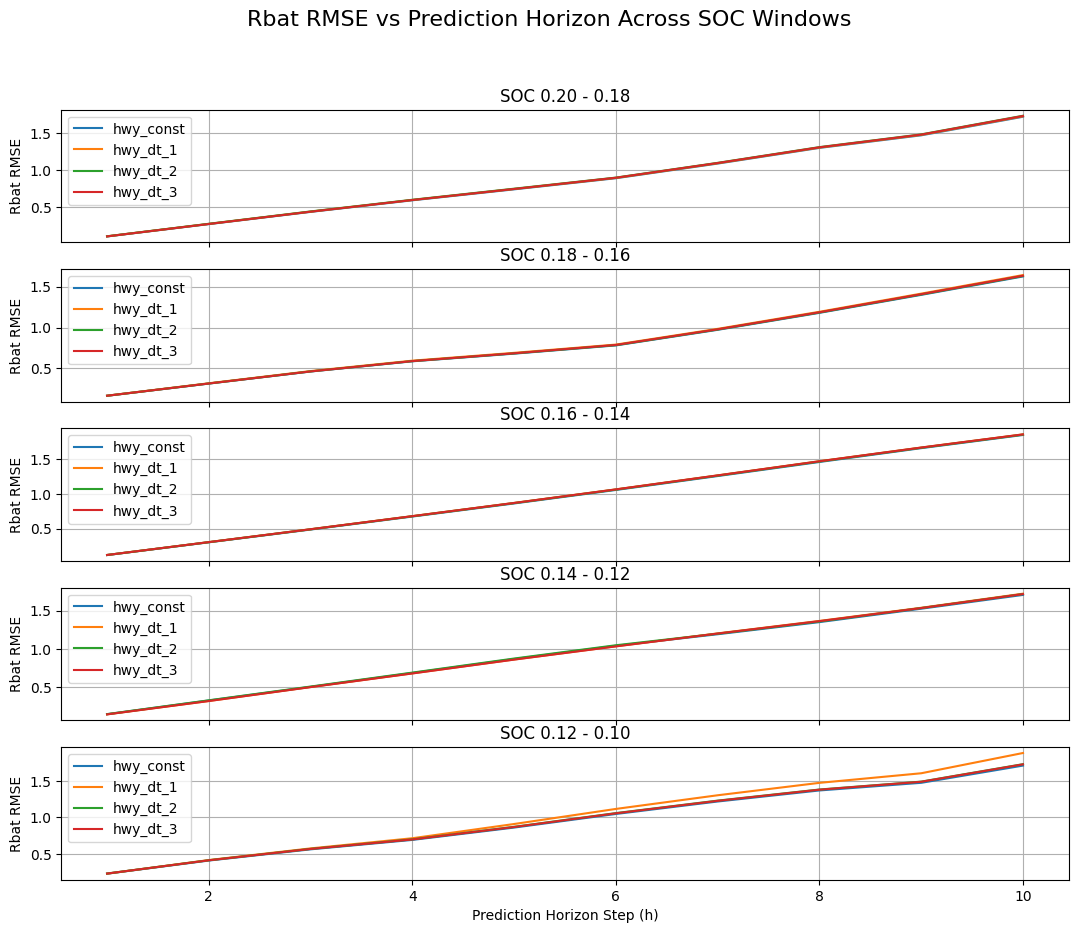

In [ ]:
#    4. MPC Prediction Accuracy - All of them
"""
        This code is structured in the following way:
        - adjust code so that it's only at the intervals where MPC updates
"""
soc_upper = 0.9
soc_lower = 0.88

for i in range(1,9):
        # Adjust the data frame so it's only when the MPC updates at the 5s interval
    def extract_5s_intervals(data:dict, pred_col='Out[0][0]', tolerance=1e-8)-> dict:
        temp = {}
        for name, df in data.items():
            """
            Extract rows where the prediction (pred_col) changes (~every 5s).
            If the very first timestamp in the original df is a multiple of 5s
            (rounded to 1 d.p.), prepend that row to the updates.
            """
            df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
            mask_updates = df[pred_col].diff().abs() > tolerance
            df_updates = df[mask_updates].copy()
            first_row = df.iloc[0]
            if round(first_row['Time'],1) % 5 == 0:
                first_row_df = first_row.to_frame().T
                df_updates = pd.concat([first_row_df, df_updates], ignore_index=True)
            df_updates.reset_index(drop=True, inplace=True)
            temp[name] = df_updates
        return temp


    #print(hwy_dt_interval['hwy_dt_1'][['Time','Tbat', 'Out[0][0]', 'Out[1][0]']].head(3))


        # Calculate RMSE
    def rmse_prediction_accuracy(df: pd.DataFrame, horizon_steps:int=10) -> dict:
        prediction_errors = {}
        for h in range(1, horizon_steps+1):
            prediction_col = f'Out[{h}][0]'                 # Column for prediction h steps into future
            predicted_temps = df[prediction_col]            # Vector of predictions at step `h`
            actual_future_temps = df['Tbat'].shift(-h)      # Find true temp `h` steps ahead
            error = predicted_temps - actual_future_temps   # Calc error for each row
            rmse = np.sqrt(np.mean(error.dropna()**2))      # Calc RMSE for horizon `h`
            prediction_errors[h] = rmse
        return prediction_errors

    rmse_dt = {}
    def append_rmse(df: dict):
        for name, df in df.items():
            rmse_output = rmse_prediction_accuracy(df=df)
            rmse_dt[name] = rmse_output

    upper_lim = 5
    fig, ax = plt.subplots(int(upper_lim), 1,figsize=(13, 10), sharex=True)
    ax_flat = ax.flatten()
    for i in range(0,upper_lim):
        hwy_dt_interval = extract_5s_intervals(hwy_dt)
        hwy_const_interval = extract_5s_intervals(hwy_const)
        append_rmse(hwy_const_interval)
        append_rmse(hwy_dt_interval)

        horizon = [1,2,3,4,5,6,7,8,9,10]
        predictions_df = pd.DataFrame({'horizon':horizon})
        
        ax = ax_flat[i]
        for name, inner_dict in rmse_dt.items():
            # 1. Create a DataFrame from the inner dictionary
            # The keys will become the 'horizon' column, and the values the 'rmse' column
            df = pd.DataFrame(inner_dict.items(), columns=['horizon', 'rmse'])
            rmse_values = inner_dict.values()
            predictions_df[f'{name}'] = rmse_values
            # 2. Add the DataFrame to the single plot
            ax.plot(df['horizon'], df['rmse'], label=name)

        # 3. Finalize the plot
        ax.set_title(f'SOC {soc_upper:.2f} - {soc_lower:.2f}')
        
        ax.set_ylabel('Rbat RMSE')
        ax.grid(True)
        ax_flat[i].legend()

        soc_upper = soc_upper - 0.02
        soc_lower = soc_lower - 0.02

    fig.suptitle('Rbat RMSE vs Prediction Horizon Across SOC Windows', fontsize=16)
    ax_flat[-1].set_xlabel('Prediction Horizon Step (h)')
    #ax_flat[-2].set_xlabel('Prediction Horizon Step (h)')

    plt.show()
    #print(predictions_df)

soc_upper = soc_upper - 0.1
soc_lower = soc_lower - 0.1

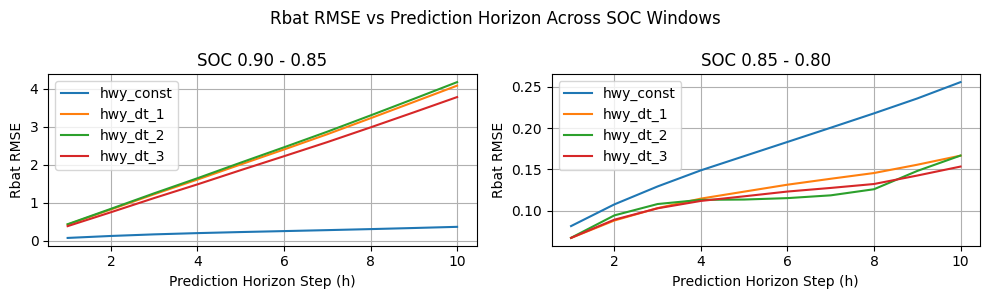

In [319]:
#    4. MPC Prediction Accuracy - Some of them
# 
"""
        This code is structured in the following way:
        - adjust code so that it's only at the intervals where MPC updates
"""
soc_upper = 0.9
soc_lower = 0.85


    # Adjust the data frame so it's only when the MPC updates at the 5s interval
def extract_5s_intervals(data:dict, pred_col='Out[0][0]', tolerance=1e-8)-> dict:
    temp = {}
    for name, df in data.items():
        """
        Extract rows where the prediction (pred_col) changes (~every 5s).
        If the very first timestamp in the original df is a multiple of 5s
        (rounded to 1 d.p.), prepend that row to the updates.
        """
        df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
        mask_updates = df[pred_col].diff().abs() > tolerance
        df_updates = df[mask_updates].copy()
        first_row = df.iloc[0]
        if round(first_row['Time'],1) % 5 == 0:
            first_row_df = first_row.to_frame().T
            df_updates = pd.concat([first_row_df, df_updates], ignore_index=True)
        df_updates.reset_index(drop=True, inplace=True)
        temp[name] = df_updates
    return temp


#print(hwy_dt_interval['hwy_dt_1'][['Time','Tbat', 'Out[0][0]', 'Out[1][0]']].head(3))


    # Calculate RMSE
def rmse_prediction_accuracy(df: pd.DataFrame, horizon_steps:int=10) -> dict:
    prediction_errors = {}
    for h in range(1, horizon_steps+1):
        prediction_col = f'Out[{h}][0]'                 # Column for prediction h steps into future
        predicted_temps = df[prediction_col]            # Vector of predictions at step `h`
        actual_future_temps = df['Tbat'].shift(-h)      # Find true temp `h` steps ahead
        error = predicted_temps - actual_future_temps   # Calc error for each row
        rmse = np.sqrt(np.mean(error.dropna()**2))      # Calc RMSE for horizon `h`
        prediction_errors[h] = rmse
    return prediction_errors

rmse_dt = {}
def append_rmse(df: dict):
    for name, df in df.items():
        rmse_output = rmse_prediction_accuracy(df=df)
        rmse_dt[name] = rmse_output

upper_lim = 2
fig, ax = plt.subplots(int(upper_lim/2), 2,figsize=(10, 3), sharex=True)
ax_flat = ax.flatten()
for i in range(0,upper_lim):
    hwy_dt_interval = extract_5s_intervals(hwy_dt)
    hwy_const_interval = extract_5s_intervals(hwy_const)
    append_rmse(hwy_const_interval)
    append_rmse(hwy_dt_interval)

    horizon = [1,2,3,4,5,6,7,8,9,10]
    predictions_df = pd.DataFrame({'horizon':horizon})
    
    ax = ax_flat[i]
    for name, inner_dict in rmse_dt.items():
        # 1. Create a DataFrame from the inner dictionary
        # The keys will become the 'horizon' column, and the values the 'rmse' column
        df = pd.DataFrame(inner_dict.items(), columns=['horizon', 'rmse'])
        rmse_values = inner_dict.values()
        predictions_df[f'{name}'] = rmse_values
        # 2. Add the DataFrame to the single plot
        ax.plot(df['horizon'], df['rmse'], label=name)

    # 3. Finalize the plot
    ax.set_title(f'SOC {soc_upper:.2f} - {soc_lower:.2f}')
    
    ax.set_ylabel('Rbat RMSE')
    ax.grid(True)

    soc_upper = soc_upper - 0.05
    soc_lower = soc_lower - 0.05

fig.suptitle('Rbat RMSE vs Prediction Horizon Across SOC Windows')
ax_flat[-1].set_xlabel('Prediction Horizon Step (h)')
ax_flat[-2].set_xlabel('Prediction Horizon Step (h)')
ax_flat[0].legend()
ax_flat[1].legend()
plt.tight_layout()
plt.show()
#print(predictions_df)

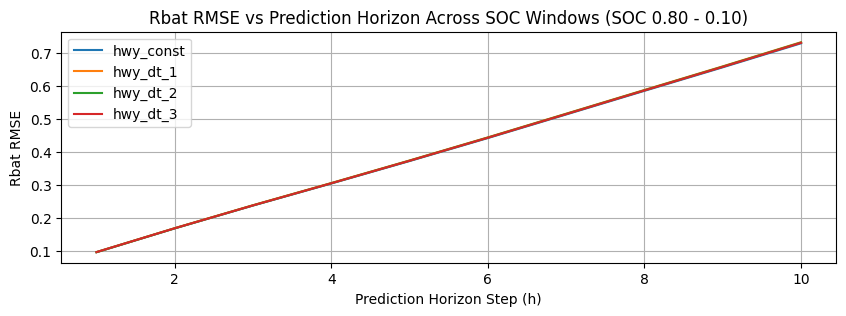

   horizon  hwy_const  hwy_dt_1  hwy_dt_2  hwy_dt_3
0        1   0.097313  0.097578  0.097097  0.097415
1        2   0.169244  0.169878  0.169282  0.169433
2        3   0.238161  0.239178  0.238578  0.238534
3        4   0.304743  0.306103  0.305523  0.305303
4        5   0.372535  0.374265  0.373680  0.373300
5        6   0.441946  0.443982  0.443387  0.442863
6        7   0.513158  0.515459  0.514816  0.514162
7        8   0.584559  0.587097  0.586374  0.585659
8        9   0.655547  0.658414  0.657620  0.656808
9       10   0.728063  0.731270  0.730432  0.729475


In [ ]:
# 4. MPC Predictive Window - Only 1
# Only 1
soc_upper = 0.8
soc_lower = 0.1

    # Adjust the data frame so it's only when the MPC updates at the 5s interval
def extract_5s_intervals(data:dict, pred_col='Out[0][0]', tolerance=1e-8)-> dict:
    temp = {}
    for name, df in data.items():
        """
        Extract rows where the prediction (pred_col) changes (~every 5s).
        If the very first timestamp in the original df is a multiple of 5s
        (rounded to 1 d.p.), prepend that row to the updates.
        """
        df = df[(df['SOC']>=soc_lower) & (df['SOC']<=soc_upper)]
        mask_updates = df[pred_col].diff().abs() > tolerance
        df_updates = df[mask_updates].copy()
        first_row = df.iloc[0]
        if round(first_row['Time'],1) % 5 == 0:
            first_row_df = first_row.to_frame().T
            df_updates = pd.concat([first_row_df, df_updates], ignore_index=True)
        df_updates.reset_index(drop=True, inplace=True)
        temp[name] = df_updates
    return temp


#print(hwy_dt_interval['hwy_dt_1'][['Time','Tbat', 'Out[0][0]', 'Out[1][0]']].head(3))


    # Calculate RMSE
def rmse_prediction_accuracy(df: pd.DataFrame, horizon_steps:int=10) -> dict:
    prediction_errors = {}
    for h in range(1, horizon_steps+1):
        prediction_col = f'Out[{h}][0]'                 # Column for prediction h steps into future
        predicted_temps = df[prediction_col]            # Vector of predictions at step `h`
        actual_future_temps = df['Tbat'].shift(-h)      # Find true temp `h` steps ahead
        error = predicted_temps - actual_future_temps   # Calc error for each row
        rmse = np.sqrt(np.mean(error.dropna()**2))      # Calc RMSE for horizon `h`
        prediction_errors[h] = rmse
    return prediction_errors

rmse_dt = {}
def append_rmse(df: dict):
    for name, df in df.items():
        rmse_output = rmse_prediction_accuracy(df=df)
        rmse_dt[name] = rmse_output


fig, ax = plt.subplots(figsize=(10, 3))

hwy_dt_interval = extract_5s_intervals(hwy_dt)
hwy_const_interval = extract_5s_intervals(hwy_const)
append_rmse(hwy_const_interval)
append_rmse(hwy_dt_interval)

horizon = [1,2,3,4,5,6,7,8,9,10]
predictions_df = pd.DataFrame({'horizon':horizon})


for name, inner_dict in rmse_dt.items():
    # 1. Create a DataFrame from the inner dictionary
    # The keys will become the 'horizon' column, and the values the 'rmse' column
    df = pd.DataFrame(inner_dict.items(), columns=['horizon', 'rmse'])
    rmse_values = inner_dict.values()
    predictions_df[f'{name}'] = rmse_values
    # 2. Add the DataFrame to the single plot
    ax.plot(df['horizon'], df['rmse'], label=name)

# 3. Finalize the plot
ax.set_title(f'SOC {soc_upper:.2f} - {soc_lower:.2f}')

ax.set_ylabel('Rbat RMSE')
ax.grid(True)

ax.set_title('Rbat RMSE vs Prediction Horizon Across SOC Windows' \
                f' (SOC {soc_upper:.2f} - {soc_lower:.2f})')
ax.set_xlabel('Prediction Horizon Step (h)')
ax.set_xlabel('Prediction Horizon Step (h)')
ax.legend()
plt.show()
print(predictions_df)

         id         std        mean      median
0  pi_hwy_1  225.490541  344.354170  334.290624
1  pi_hwy_2  215.083149  286.418243  262.363315
2  pi_hwy_3  140.937502  311.130059  308.692455
[{'id': 'pi_hwy_1', 'std': np.float64(225.4905411486005), 'mean': np.float64(344.3541701442452), 'median': np.float64(334.29062366485596)}, {'id': 'pi_hwy_2', 'std': np.float64(215.08314948215397), 'mean': np.float64(286.41824306428134), 'median': np.float64(262.3633146286011)}, {'id': 'pi_hwy_3', 'std': np.float64(140.93750187630957), 'mean': np.float64(311.1300589489093), 'median': np.float64(308.69245529174805)}]


<function matplotlib.pyplot.show(close=None, block=None)>

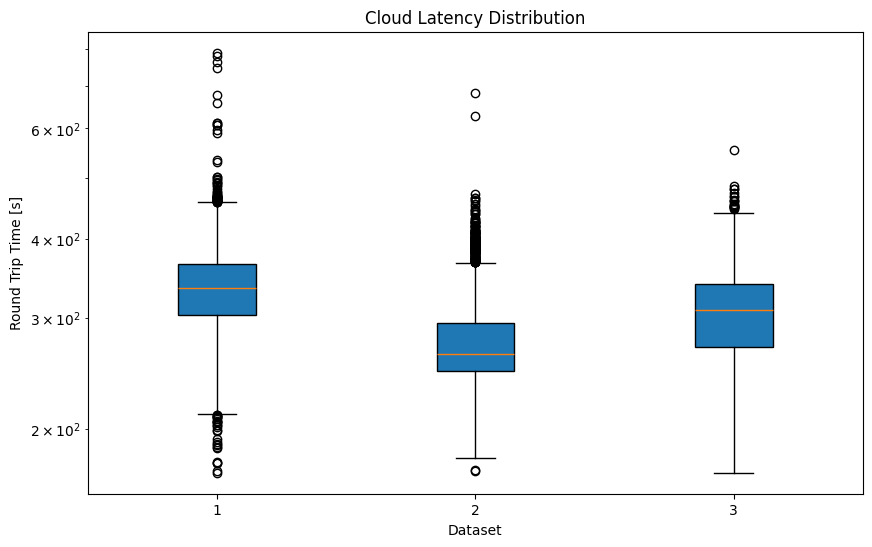

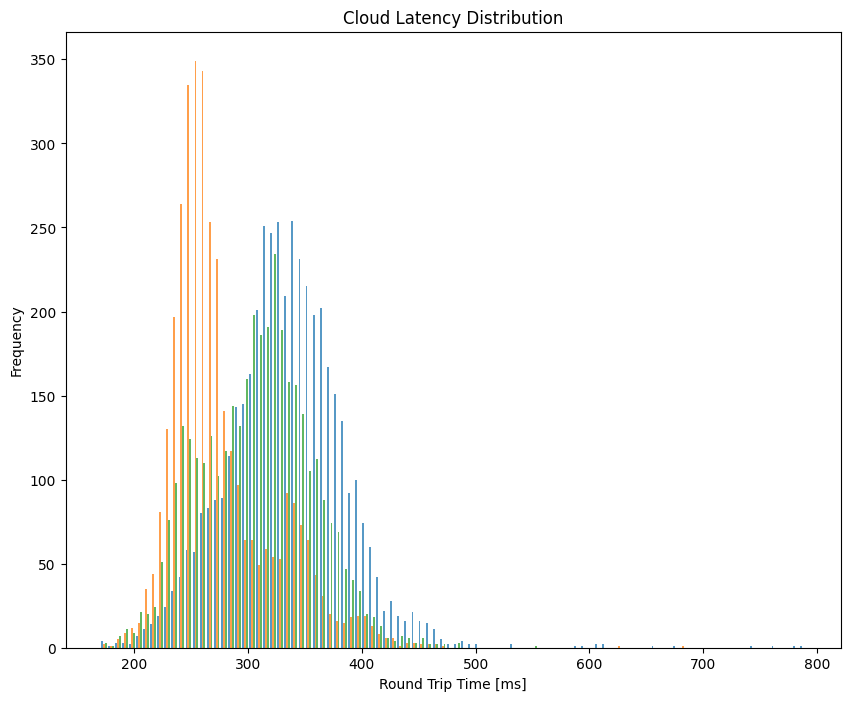

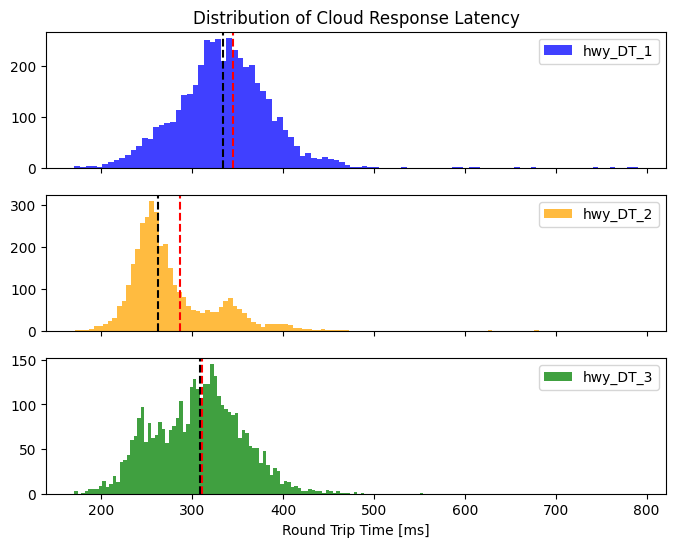

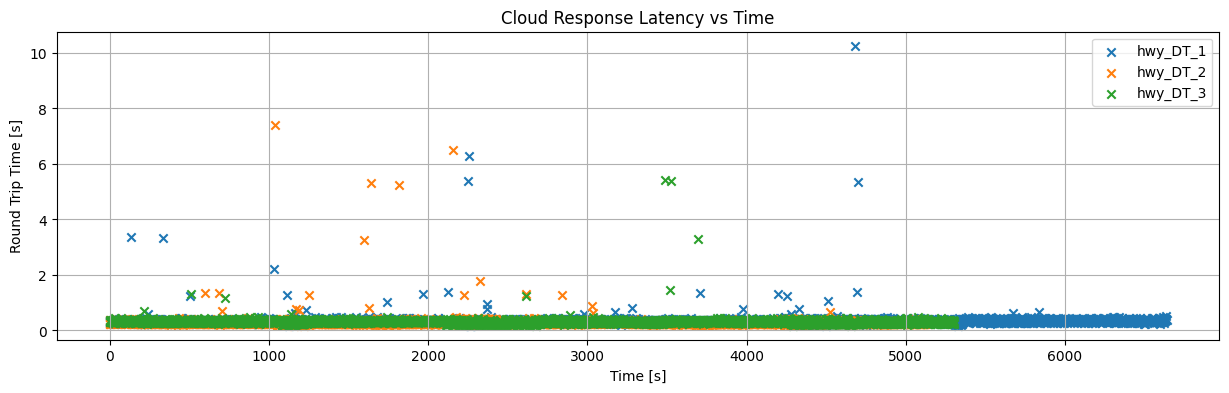

In [186]:
# 6. CLOUD ROUND TRIP
stats = []
plot_data = []
plot_labels = []

for name, df in pi_logs.items():
    df['round_trip'] = df['time_recv'] - df['time_sent']
    df['time'] = df['time_sent'] - df['time_sent'].iloc[0]
    std = np.std(df['round_trip'])
    mean = np.mean(df['round_trip'])
    median = np.median(df['round_trip'])
    metric_dic = {
        'id': name,
        'std': std*1000,
        'mean': mean*1000,
        'median': median*1000
    }
    stats.append(metric_dic)
    outlier_threshold = mean + (2 * std)
    filtered_data = df[(df['round_trip'] <= outlier_threshold) & df['round_trip'] >= outlier_threshold]['round_trip']
    #filtered_data = df['round_trip']
    plot_data.append(filtered_data.values * 1000)
    plot_labels.append(name)

stats_df = pd.DataFrame(stats)
print(stats_df)
print(stats)

# BOXPLOT
plt.figure(figsize=(10,6))
plt.boxplot(
    plot_data,
    label=plot_labels,
    vert=True,
    patch_artist=True)
plt.ticklabel_format(style='plain', axis='y')  # 'plain' style prevents scientific notation
plt.xlabel("Dataset")
plt.ylabel("Round Trip Time [s]")
plt.yscale('log')
plt.title("Cloud Latency Distribution")
plt.grid(axis='y', linestyle='--')
plt.show

# HISTOGRAM
plt.figure(figsize=(10,8))
plt.hist(plot_data, bins=100, alpha=0.75, label='RTT Distribution')
plt.xlabel('Round Trip Time [ms]')
plt.ylabel('Frequency')
plt.title('Cloud Latency Distribution')
plt.show
number_of_plots = 3
    # Subplot Histograms
fig, ax = plt.subplots(number_of_plots, 1,sharex=True, figsize=(8,6))
colours = ['blue','orange','green']
for i in range(0, number_of_plots):
    ax[i].hist(plot_data[i], bins=100, 
               alpha=0.75, 
               label=f'hwy_DT_{i+1}',
               color=f'{colours[i]}')
    
    mean_val = stats_df.loc[i, 'mean']
    std_val = stats_df.loc[i, 'std']
    median_val = stats_df.loc[i, 'median']
    """ FOR ADDING TEXT
    text_str = (f"Median: {median_val:.2f}ms\n"
                f"$\\mu$: {mean_val:.2f}ms\n" 
                f"$\\sigma$: {std_val:.2f}ms")
    props = dict(boxstyle='round', alpha=0.5) # Style for the text box
    ax[i].text(0.95, 0.95, text_str, 
        transform=ax[i].transAxes, # This makes coordinates relative to the plot size
        fontsize=10,
        verticalalignment='top', 
        horizontalalignment='right',
        bbox=dict(
        facecolor='none',  # Makes the background transparent (no fill)
        edgecolor='none'))   # Removes the border line
    """
    ax[i].axvline(
        x=mean_val,
        color='red',
        linestyle='--',
        #label='$\\sigma$'
    )
    ax[i].axvline(
        x=median_val,
        color='black',
        linestyle='--',
        #label='Median'
    )
    ax[i].legend()
    
ax[-1].set_xlabel('Round Trip Time [ms]')
ax[0].set_title('Distribution of Cloud Response Latency')
plt.show
    


# SCATTER GRAPH
plt.figure(figsize=(15,4))
i = 1
for name, df in pi_logs.items():
    outlier_mask = df['round_trip']
    plt.scatter(df['time'], 
                df['round_trip'], 
                label=f'hwy_DT_{i}', marker='x',
                )
    i+=1
plt.xlabel("Time [s]")
plt.ylabel("Round Trip Time [s]")
plt.title("Cloud Response Latency vs Time")
plt.grid(True)
plt.legend()
plt.show



    
